In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Encoding Categorical Variables

#### One-Hot Encoding

In [4]:
data = [['Blue'], ['Red'], ['Orange'], ['Black'], ['Blue'], ['Red'], ['Red']]

In [5]:
onehot_encoder = OneHotEncoder(sparse_output = False)

In [6]:
onehot_encoded = onehot_encoder.fit_transform(data)

In [7]:
print(onehot_encoded)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [8]:
df2 = df.copy()

In [9]:
end = onehot_encoder.fit_transform(df2[['room_type']])
end

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

#### Label Encoding

In [10]:
label_encoder = LabelEncoder()

In [11]:
data_labeled = label_encoder.fit_transform(data)
data_labeled

C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 3, 2, 0, 1, 3, 3], dtype=int64)

In [12]:
df3 = df.copy()

In [13]:
label_encoded = label_encoder.fit_transform(df3['room_type'])
label_encoded

array([1, 0, 1, ..., 1, 0, 0])

### Scaling Numerical Data

#### Standard Scaler

In [14]:
df4 = df.copy()

In [15]:
std_scaler = StandardScaler()

In [16]:
std_scaled = std_scaler.fit_transform(df4[['price']])

In [17]:
std_scaled

array([[-0.01545572],
       [ 0.30104445],
       [-0.01129124],
       ...,
       [-0.28198217],
       [-0.13622552],
       [-0.052936  ]])

#### MinMaxScaler

In [20]:
df5 = df.copy()

In [21]:
minmax_scaled = MinMaxScaler()

In [22]:
minmax_scaled = minmax_scaled.fit_transform(df5[['price']])

In [23]:
minmax_scaled

array([[0.0149],
       [0.0225],
       [0.015 ],
       ...,
       [0.0085],
       [0.012 ],
       [0.014 ]])

### Exploratory Data Analysis

In [29]:
data = pd.read_csv('weight-height.csv')

In [30]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Histogram

##### Using Matplotlib

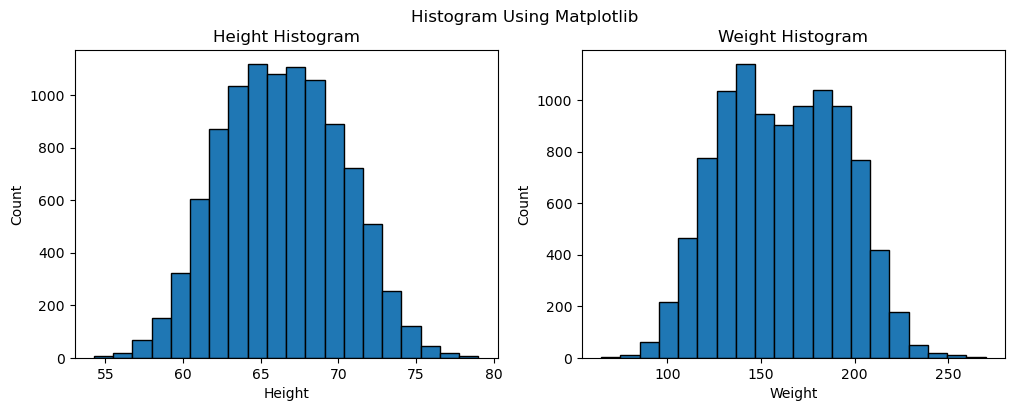

In [53]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['Height'], bins = 20, edgecolor = 'black')
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Height Histogram')

plt.subplot(1, 2, 2)
plt.hist(data['Weight'], bins = 20, edgecolor = 'black')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight Histogram')

plt.suptitle('Histogram Using Matplotlib')
plt.show()

##### Using Seaborn

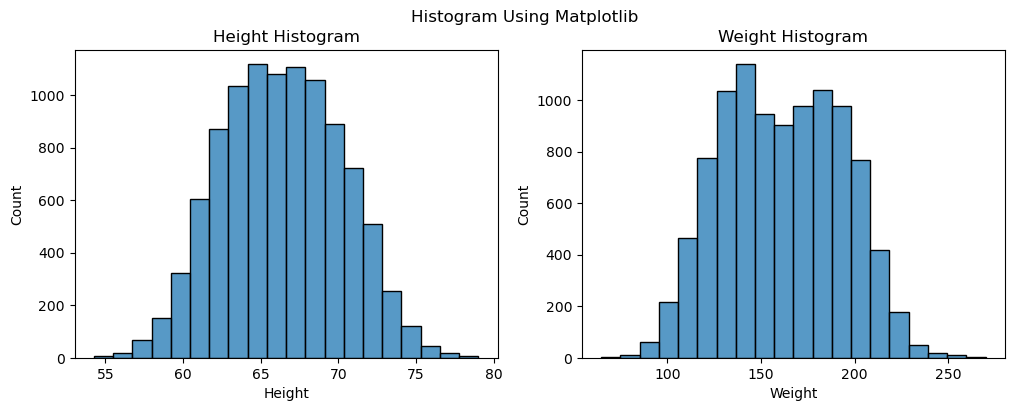

In [50]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data['Height'], bins = 20)
plt.title('Height Histogram')

plt.subplot(1, 2, 2)
sns.histplot(data['Weight'], bins = 20)
plt.title('Weight Histogram')

plt.suptitle('Histogram Using Matplotlib')
plt.show()

#### Box Plot

##### Using Matplotlib

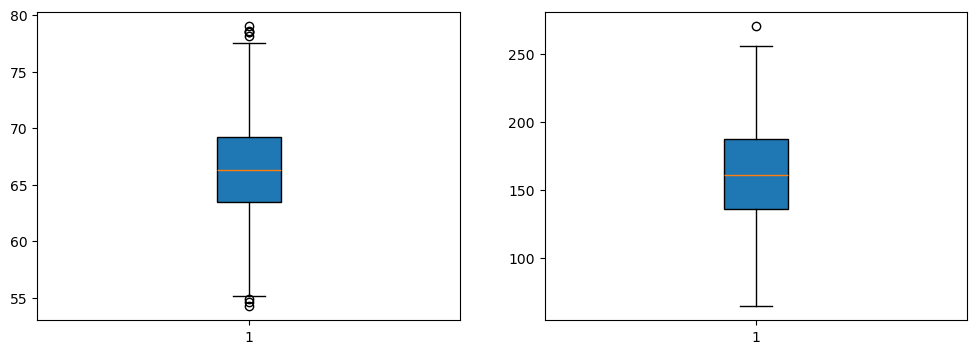

In [76]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(data['Height'], patch_artist = True)

plt.subplot(1, 2, 2)
plt.boxplot(data['Weight'], patch_artist = True)
plt.show()

##### Using seaborn

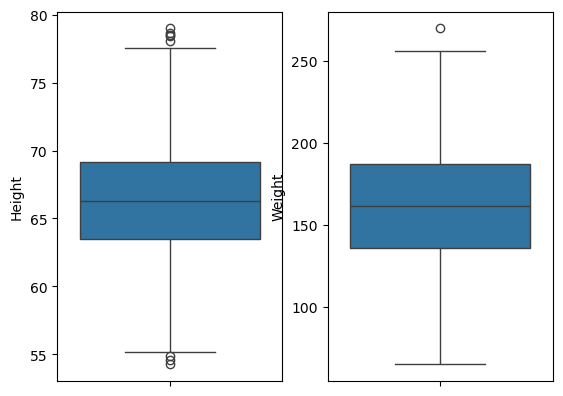

In [80]:
plt.subplot(1, 2, 1)
sns.boxplot(data['Height'])

plt.subplot(1, 2, 2)
sns.boxplot(data['Weight'])
plt.show()

#### Scatter Plot

##### Matplotlib

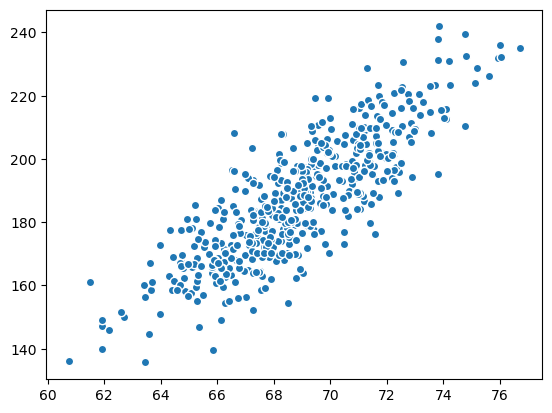

In [91]:
plt.scatter(data['Height'].iloc[:500], data['Weight'].iloc[:500], edgecolor = 'white')
plt.show()

##### Seaborn

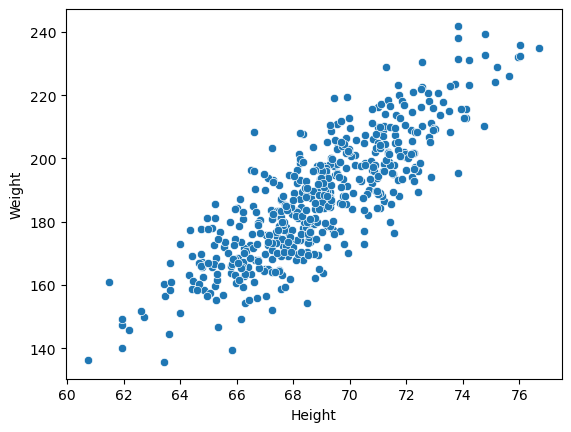

In [90]:
sns.scatterplot(data = data, x = data['Height'].iloc[:500], y = data['Weight'].iloc[:500])
plt.show()

#### Pairplot

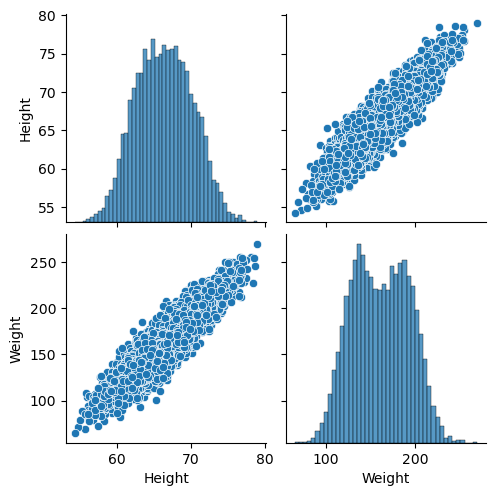

In [92]:
sns.pairplot(data)

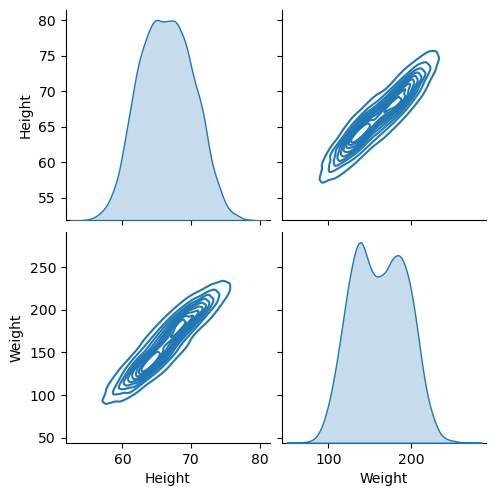

In [94]:
sns.pairplot(data, kind = 'kde')